# Assignment 4 - Clustering Data Science Jobs

Write a 500-word Medium post on constructing and characterizing clusters in a given dataset. Using methods from module 4, you should 

1. construct a dataset of interest, 
2. select (and justify) a k value for the number clusters in your data, 
3. cluster your data using one of the methods we've discussed, and 
4. describe what you think these clusters represent.

As in the previous assignment, you may use any distance/similarity metric you like, but note that your choice of metric impacts which clustering metric you use, and you can collect your own data or use a pre-existing dataset for this assignment. Feel free to apply dimensionality-reduction techniques from the past module as well!

In [43]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.model_selection import train_test_split as tts

# 1. Selecting a dataset

In [83]:
# Loading the data 

salaries_df = pd.read_csv("data/ds_salaries.csv")
print(f"Rows x Columns: {salaries_df.shape}", '\n')
print(f"Variables: {salaries_df.columns}")

Rows x Columns: (3755, 11) 

Variables: Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [86]:
# Converting categorical variables into dummy variables

salaries_df_with_dummies = pd.get_dummies(salaries_df) # select the features
print(f"Rows x Columns (w. Dummy Variables): {salaries_df_with_dummies.shape}", '\n')
print(salaries_df_with_dummies.columns)

Rows x Columns (w. Dummy Variables): (3755, 278) 

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       ...
       'company_location_SI', 'company_location_SK', 'company_location_TH',
       'company_location_TR', 'company_location_UA', 'company_location_US',
       'company_location_VN', 'company_size_L', 'company_size_M',
       'company_size_S'],
      dtype='object', length=278)


In [46]:
# Cleaning up the column names of the dataframe

def encode(s): 
    """s: A string to be encoded. 
    
    Returns a formatted string, with all whitespace removed."""
    
    s = s.strip()           # remove trailing whitespace
    s = s.replace(' ', '_') # replace spaces with underscores 
    s = s.replace('-', '_') # replace hyphen with underscores

    # replace braces
    s = s.replace('(', '_')
    s = s.replace(')', '_')

    # replace colons
    s = s.replace(':', '_')
    s = s.replace(';', '_')

    # make the text lowercase
    s = s.lower()           
    
    try: 
        # throw exception if the first character is non-numeric, otherwise, 
        # set the first character as an underscore
        c = int(s[0])
        s = "_" + s
    except ValueError:
        pass

    return s
    
salaries_df_with_dummies.columns = salaries_df_with_dummies.columns.map(encode)
salaries_df_with_dummies.columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio',
       'experience_level_en', 'experience_level_ex', 'experience_level_mi',
       'experience_level_se', 'employment_type_ct', 'employment_type_fl',
       ...
       'company_location_si', 'company_location_sk', 'company_location_th',
       'company_location_tr', 'company_location_ua', 'company_location_us',
       'company_location_vn', 'company_size_l', 'company_size_m',
       'company_size_s'],
      dtype='object', length=278)

# 2. Creating the model, and clustering the data

## Using elbow method to determine K

In [61]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [90]:
# Convert the dataframe to a numpy array
X = salaries_df_with_dummies.to_numpy()

# Use Principal Component Analysis to reduce the dimensionality of the dataset 
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
print(f"After PCA: {X_pca.shape}")

After PCA: (3755, 5)


Text(0.5, 0, 'Number of Clusters')

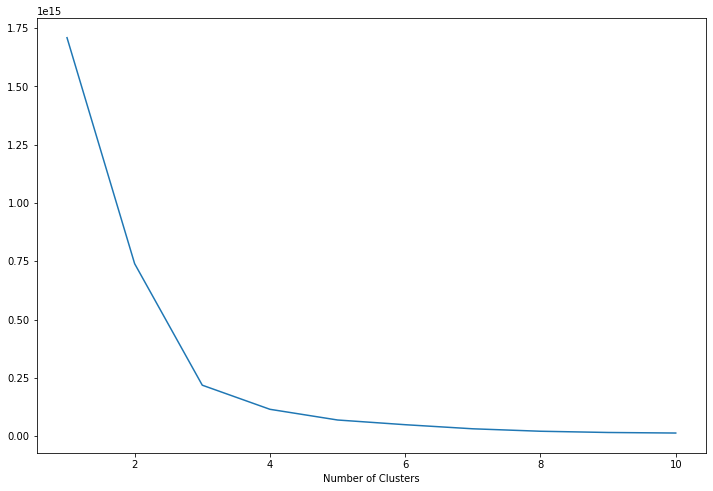

In [92]:
# Use elbow method to determine the optimal number of clusters
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

# Calculate the within-cluster sum of squares for different values of k
kmax = 10
sse = calculate_WSS(X_pca, kmax)

# Plot the curve
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(1, 11), sse)
ax.set_xlabel("Number of Clusters")

In [94]:
%matplotlib qt

In [95]:
# Run k-means analysis on the salaries_df_with_dummies data frame.
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_pca) 
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.set_title("Data Science Job Clusters using K-Means Algorithm (k=5)") 


In [ ]:
for c in kmeans.cluster_centers_: 
    ax.plot(c, )

In [98]:
kmeans.cluster_centers_

array([[-4.94498188e+04,  1.37135184e+03, -1.83897784e-01,
        -8.33776458e-03, -3.27569138e-03],
       [ 9.97614286e+06, -6.54142219e+04, -2.02159058e+01,
         4.05404754e-01, -2.97584383e-01],
       [ 3.02094472e+07, -2.97913184e+04, -1.05555915e+01,
        -3.06100386e+00, -1.29331689e-01],
       [ 5.23529577e+06, -6.45950982e+04, -1.98454534e+00,
         4.37959606e-01, -5.74525630e-02],
       [ 1.49883637e+06, -1.01786382e+05,  1.93813939e+01,
         6.85766637e-01,  3.45707450e-01]])